In [1]:
import os
import torch


In [2]:
# Change the working directory to the parent directory
os.chdir("..")

# Verify the current working directory
print("Current Directory:", os.getcwd())

Current Directory: d:\workspace\iscat


In [3]:
from src.data_processing.dataset import iScatDataset
from src.data_processing.utils import Utils
data_path = os.path.join('data', 'iScat', 'Data', '2024_11_11', 'Metasurface', 'Chip_02')
image_paths,target_paths = Utils.get_data_paths(data_path)
dataset = iScatDataset(image_paths, target_paths, preload_image=True)

Creating Masks: 100%|██████████| 5/5 [00:00<00:00, 73.18it/s]


In [4]:
image_paths

['data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\02_01_BF.nd2',
 'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\02_02_BF.nd2',
 'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\02_03_BF.nd2',
 'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 04\\Brightfield\\02_04_BF.nd2',
 'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 05\\Brightfield\\02_05_BF.nd2']

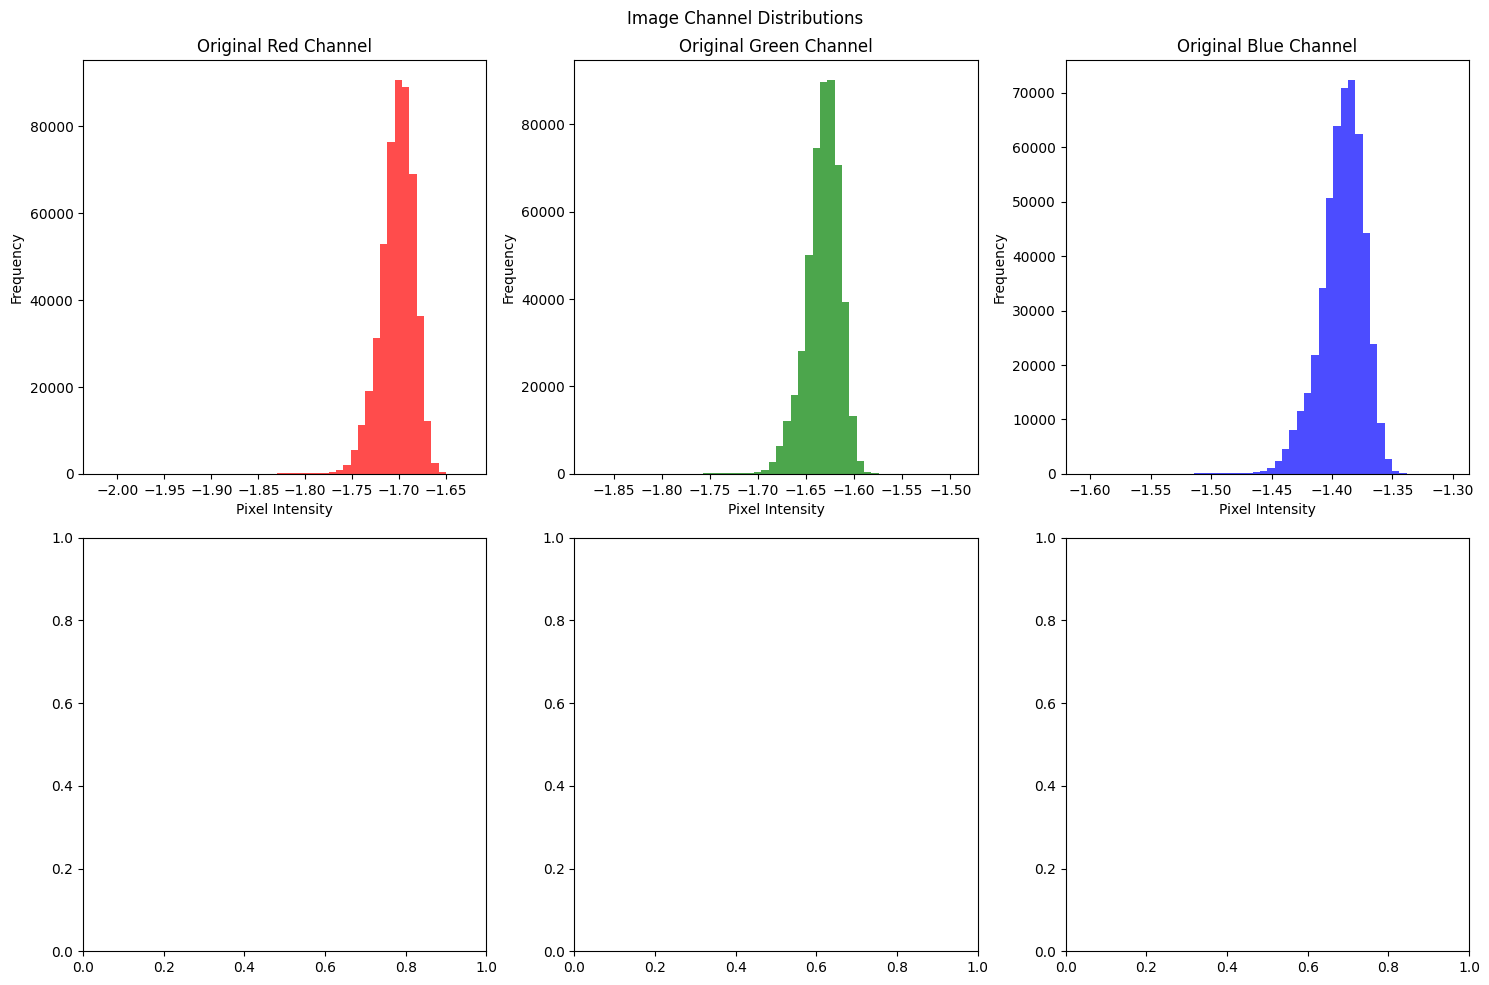

In [5]:
import matplotlib.pyplot as plt
import torch

def plot_dataset_distribution(dataset, num_images=10):
    """
    Plot distribution of images across the dataset.
    
    Args:
    dataset: Your custom dataset
    num_images: Number of images to sample
    """
    # Collect images
    images = torch.stack([dataset[i][0] for i in range(num_images)])
    
    # Create subplots
    fig, axs = plt.subplots(2, images.shape[1], figsize=(15, 10))
    fig.suptitle('Image Channel Distributions')
    
    # Colors for each channel
    colors = ['red', 'green', 'blue']
    channel_names = ['Red', 'Green', 'Blue']
    
    # Plot original and normalized distributions
    for channel in range(images.shape[1]):
        # Original distribution
        channel_data = images[:, channel, :, :].numpy().flatten()
        axs[0, channel].hist(channel_data, bins=50, color=colors[channel], alpha=0.7)
        axs[0, channel].set_title(f'Original {channel_names[channel]} Channel')
        axs[0, channel].set_xlabel('Pixel Intensity')
        axs[0, channel].set_ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

# Usage
plot_dataset_distribution(dataset)

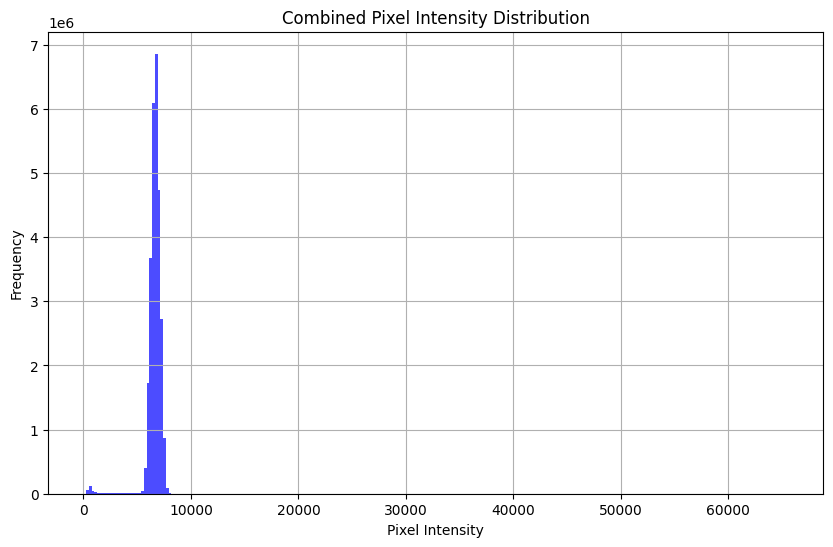

Global Mean: 6640.83
Global Std: 742.31


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import nd2

# Paths to .nd2 images

# Initialize an empty list to hold all pixel values
all_pixels = []

# Load all images and accumulate their pixel values
for path in image_paths:
    with nd2.ND2File(path) as nd2_file:
        np_array = nd2_file.asarray()
        np_array = np_array[0]   # Convert to numpy array
    all_pixels.append(np_array.flatten())  # Flatten and add to the list

# Concatenate all pixels into a single array
all_pixels = np.concatenate(all_pixels)

# Compute global statistics
global_mean = np.mean(all_pixels)
global_std = np.std(all_pixels)

# Plot combined pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(all_pixels, bins=256, range=(0, np.iinfo(all_pixels.dtype).max), color='blue', alpha=0.7)
plt.title('Combined Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the computed statistics
print(f"Global Mean: {global_mean:.2f}")
print(f"Global Std: {global_std:.2f}")


In [8]:
import numpy as np
import nd2

# Paths to .nd2 images
image_paths = [
    'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\02_01_BF.nd2',
    'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\02_02_BF.nd2',
    'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\02_03_BF.nd2',
    'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 04\\Brightfield\\02_04_BF.nd2',
    'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 05\\Brightfield\\02_05_BF.nd2',
]

# Initialize global min and max
global_min = np.inf
global_max = -np.inf

# Loop through each image
for path in image_paths:
    with nd2.ND2File(path) as nd2_file:
        np_array = nd2_file.asarray()  # Load image as numpy array
    # Update global min and max
    global_min = min(global_min, np_array.min())
    global_max = max(global_max, np_array.max())

# Print the results
print(f"Global Min Pixel Value: {global_min}")
print(f"Global Max Pixel Value: {global_max}")


Global Min Pixel Value: 237
Global Max Pixel Value: 15321
